# Logistic Regression

* [Overview](#overview)
* [Logistic regression](#sec1)
    * [Fitting the model](#subsec1)
    * [Evaluating the model](#subsec2)
    * [Example](#subsec3) 
    * [LDA and logistic regression](#subsec4)
* [Summary](#sum)
* [References](#refs)

## <a name="overview"></a> Overview

In this section, we review the <a href="https://en.wikipedia.org/wiki/Logistic_regression">logistic regression</a> model. This is a simple linear classifier. We will go over the model by assuming that the dependent variable $Y$ is a **dichotomous variable** i.e. a variable that assumes two values or two classes. In particular, in this section we cover the following topics:

- The logistic regression model 
- Estimating the model parameters
- Model evaluation

A nice introduction to the topic can be found at <a href="https://www.datacamp.com/tutorial/understanding-logistic-regression-python">Understanding Logistic Regression in Python Tutorial</a>. An equally nice tutorial on logistic regression can be found at <a href="https://machinelearningmastery.com/logistic-regression-with-maximum-likelihood-estimation/">A Gentle Introduction to Logistic Regression With Maximum Likelihood Estimation</a>.

## <a name="ekf"></a> Logistic regression

Let's consider the scenario where we are dealing with a binary classification problem i.e. two classes. We have a certain number of features $x_i$ and we want to predict $y_i$. A logistic regression model is very similar to a linear regression model. Indeed, both techniques model the target variable with a line (or hyperplane, depending on the number of dimensions of input. Linear regression fits the line to the data. We can use it to predict a new quantity, whereas logistic regression fits a line to best separate the two classes.
Hence the logistic regression equation also consists of a bias term and separate logistic regression coefficients one for each independent variable [3]

$$y = w_0 + w_1x_{1}+ \dots + w_{k}x_{k} + \epsilon
\label{eq:eq1}\tag{1}$$

As we already know, this model can produce a $y$ in the range $(-\infty, +\infty)$ and this is not suitable for us. In particular, this model does not force $y=0$ or $y=1$ despite the fact that sometimes it can produce a decent classifier [4]. Let us introduce the following transformation

$$
\sigma(z) = \frac{1}{1 + e^{-z}}
\label{eq:eq2}\tag{2}$$

The following Python snippet plots the values of $\sigma$

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
sns.set()

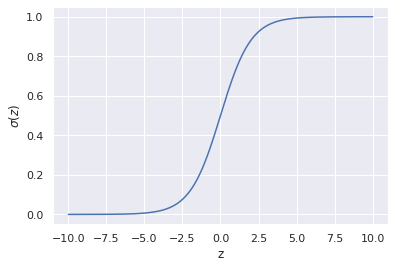

In [7]:
z = np.linspace(-10.0, 10.0, 10000)

def sigma(x):
    return 1.0/(1.0 + np.exp(-x))

plt.plot(z, sigma(z))
plt.xlabel("z")
plt.ylabel("$\sigma(z)$")
plt.show()

Equation ([2](#mjx-eqn-sigmoid)) is called the <a href="https://en.wikipedia.org/wiki/Sigmoid_function">sigmoid function</a>. The sigmoid function, also called logistic function, produces an ‘S’ shaped curve. It takes any real-valued number and map it into a value between 0 and 1. If the curve goes to positive infinity, then $y$ is predicted as 1, and if the curve goes to negative infinity, $y$ is predicted as 0. Another interesting property of the sigmoid function is that its derivative is given by equation ([3](#mjx-eqn-sigmoid))


$$\frac{d\sigma}{dz}=\sigma(z)(1-\sigma(z))
\label{eq:eq3}\tag{3}$$

Thus the logistic regression model is given by equation ([4](#mjx-eqn-sigmoid))

$$y = \sigma(w_0 + w_1x_{1}+ \dots + w_{k}x_{k}) + \epsilon \label{eq:eq4}\tag{4}$$

The model output $y$ is the logit function. It can be converted to  as a predicted probability for belonging to class 1 [3].  

---

**logit**

The <a href="https://en.wikipedia.org/wiki/Logit">logit</a> is defined as the inverse of the  sigmoid function i.e.

$$logit(p) = \sigma^{-1}(p) = ln\left(\frac{p}{1-p}\right) \label{eq:eq5}\tag{5}$$

The ratio of probabilities 

$$\frac{p}{1-p} \label{eq:eq6}\tag{6}$$

is called the odds. 

Since the odds often do not follow the shape of a normal distribution and they often display nonlinearities, we transform it using the natural logarithm i.e. the logit [3]. The following Python snippet illustrates the difference between the logit and the odds



In [1]:
p = 0.6
print("Probability of event p={}".format(p))
print("Odds={}".format(p/(1-p)))

p = 0.5
print("Probability of event p={}".format(p))
print("Odds={}".format(p/(1-p)))

p = 0.3
print("Probability of event p={}".format(p))
print("Odds={}".format(p/(1-p)))


Probability of event p=0.6
Odds=1.4999999999999998
Probability of event p=0.5
Odds=1.0
Probability of event p=0.3
Odds=0.4285714285714286


Thus the odds indicate how may times the event is more likely to occur. We can go from the logit function to $p$ using the following formula

$$ p = \frac{\text{odds}}{\text{odds + 1}} \label{eq:eq7}\tag{7}$$


where the odds is given by

$$\text{odds} = exp(y) \label{eq:eq8}\tag{8}$$

giving,

$$ p =\frac{1}{1 + exp(-y)} \label{eq:eq9}\tag{9}$$

----

### <a name="subsec3"></a> Fitting the model

We now turn our attention into fitting the model i.e. estimating the parameters $\mathbf{w}$. In contrast to multiple linear regression model where we use a least-squares estimation, for logistic regression we use an iterative procedure. Indeed as mentioned above, with logistic regression, the output $y$ is the log-odd ration i.e. 

$$y = log\left(\frac{p}{1-p}\right) \label{eq:eq10}\tag{10}$$

Consider the function $l$:

$$l = \hat{y}y + (1-\hat{y})(1-y) \label{eq:eq11}\tag{11}$$

The function $l$ returns a large probability when the model is close to the matching class value, and a small value when it is far away. The following script confirms this

In [2]:
def l(y, yhat):
    return yhat * y + (1 - yhat) * (1 - y)

In [3]:
print(f"y=1, yhat=0.9 l={l(1.0, 0.9)}")
print(f"y=1, yhat=0.1 l={l(1.0, 0.1)}")
print(f"y=0, yhat=0.1 l={l(0.0, 0.1)}")
print(f"y=0, yhat=0.9 l={l(0.0, 0.9)}")

y=1, yhat=0.9 l=0.9
y=1, yhat=0.1 l=0.1
y=0, yhat=0.1 l=0.9
y=0, yhat=0.9 l=0.09999999999999998


Taking the log transform gives us the following likelihood model

$$l=log\left(\hat{y}\right)y + log\left(1-\hat{y}\right)(1-y) \label{eq:eq12}\tag{12}$$

Summing the likelihood function across all examples in the dataset we get the loss function we will try to minimize

$$L = \sum_{i}^N log\left(\hat{y}_i\right)y_i + log\left(1-\hat{y}_i\right)(1-y_i) \label{eq:eq13}\tag{13}$$

Unfortunately, this is a non-linear function resulting in a non-linear optimization problem. Hence, we cannot use ordinary least squares like we did with linear regression.  Therefore, an iterative optimization algorithm must be used like <a href="https://en.wikipedia.org/wiki/Gradient_descent">gradient descent</a>.

### <a name="subsec3"></a> Evaluating the model

Ok, so we fitter the model, now we want to evaluate how good is the fit. The performance of classification algorithms is typically assessed using metrics such as the accuracy of the model. This is defined as the ratio of

$$\text{Accuracy} = \frac{\text{Number of correct classification}}{\text{Total number of points}} \label{eq:eq14}\tag{14}$$

Knowing the accuracy allows to calculate the error rate and vice versa as the two are related according to

$$\text{Error rate} = 1 - \text{Accuracy} \label{eq:eq15}\tag{15}$$

However, when we deal with imbalanced classes this metric is not enough and can even be misleading. A <a href="https://en.wikipedia.org/wiki/Confusion_matrix">confusion matrix</a> allows us to visualize  various quality metrics associated with the goodness of fit.

### <a name="#"></a> Example

Now that we know how to fit the model in the data and evaluate it, let's go over a hands-on practical example. We will use scikit-learn. However, you can find examples in <a href="https://github.com/pockerman/comp_stats_scala">Scala</a>. For simple Python implementations you can check <a href="https://machinelearningmastery.com/implement-logistic-regression-stochastic-gradient-descent-scratch-python/">How To Implement Logistic Regression From Scratch in Python</a> or [5]. The following example is taken from the official <a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html">scikit-learn documentation</a>. 

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris

In [8]:
# load data and classes
X, y = load_iris(return_X_y=True)


In [9]:
clf = LogisticRegression(random_state=0)
clf.fit(X, y)

/home/alex/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [10]:
# the mean accuracy over the data points
clf.score(X, y)

0.9733333333333334

### LDA and logistic regression

Logistic regression is very similar to <a href="https://en.wikipedia.org/wiki/Linear_discriminant_analysis">linear discriminant analysis</a> or LDA in the sense that both lead to a linear classification rule [4]. We will say more about LDA in a next section.

## Summary

In this section we touched upon the logistic regression model. This is simple linear classifier that has low computational cost. It works both with numeric and nominal values. 

However, as a linear model cannot handle cases where the decision boundary is non-linear. Thus, it is a model that may exhibit high bias and therefore exhibit underfitting.

The logistic regression model is similar to the linear regression equation; it consists of a bias term and separate logistic regression coefficients one for each independent variable. The logistic or sigmoid function is used in order to map the $(-\infty, +\infty)$ interval that typically is the range of values for the linear regression model to the $[0,1]$ range. The output of the model is the so-called logit or log-odds. 

## <a name="refs"></a> References

1. <a href="https://en.wikipedia.org/wiki/Logistic_regression">Logistic regression</a> 
2. Kevin P. Murphy, _Machine learning. A probabilistic perspective_, The MIT Press.
3. Larry Hatcher, _Advanced statistics in research_, Shadow Finch Media.
4. Larry Wasserman, _All of Statistics: A concise course in statistical inference_, Springer.
5. Joel Grus, _Data science from scratch. First principles with Python_, O'Reilly.